In [1]:
# import datacube
# import matplotlib.pyplot as plt
# from datacube.storage import masking
# from odc.algo import to_f32

# # Connect to the datacube
# dc = datacube.Datacube(app='scl-example')

# # Define the query parameters
# query = {
#     'time': ('2022-07-01', '2023-03-31'),
#     'x': (80.78694696, 81.02203692),
#     'y': (15.75418332, 15.85828652),
#     'measurements': ['scl'],
#     'resolution': (-20, 20),
#     'output_crs': 'EPSG:3577'
# }
# scl = dc.load(product='s2a_sen2cor_granule', 
#               x=(80.78694696, 81.02203692), 
#               y=(15.75418332, 15.85828652), 
#               time='2023-02-01', 
#               measurements=['scl'])

# # Load the data and convert to float32
# ds = dc.load(product="s2a_sen2cor_granule",**query)
# ds = to_f32(ds)

# # Mask the clouds, shadows, and snow using the SCL_20m band
# scl_mask = masking.make_mask(ds.SCL_20m, sca=[4, 5, 6, 7, 11])
# ds = ds.where(scl_mask)

# # Plot the result
# fig, ax = plt.subplots(figsize=(8, 8))
# ds.SCL_20m.plot(ax=ax, cmap='tab20')
# plt.show()


## Importing Packages

In [2]:
import datacube
import matplotlib.pyplot as plt
import numpy as np
from deafrica_tools.plotting import rgb, display_map

## Connecting to Datacube

In [3]:
dc = datacube.Datacube(app='my_app')

## Define the area of interest

In [4]:
aoi = {
    'longitude': (80.78694696, 81.02203692),
    'latitude': (15.75418332, 15.85828652),
    'time': ('2022-01-01', '2023-12-31')
}

## Load Sentinel-2 data

In [5]:
ds = dc.load(product='s2a_sen2cor_granule',
             measurements=['scl', 'red', 'green', 'blue'],
             resolution = (-30, 30),
             output_crs = "EPSG:3577",
             **aoi)

## Select a single time slice

In [6]:
ds_slice = ds.isel(time=0)
ds_slice1 = ds.isel(time=1)

## Plot the SCL_20m band

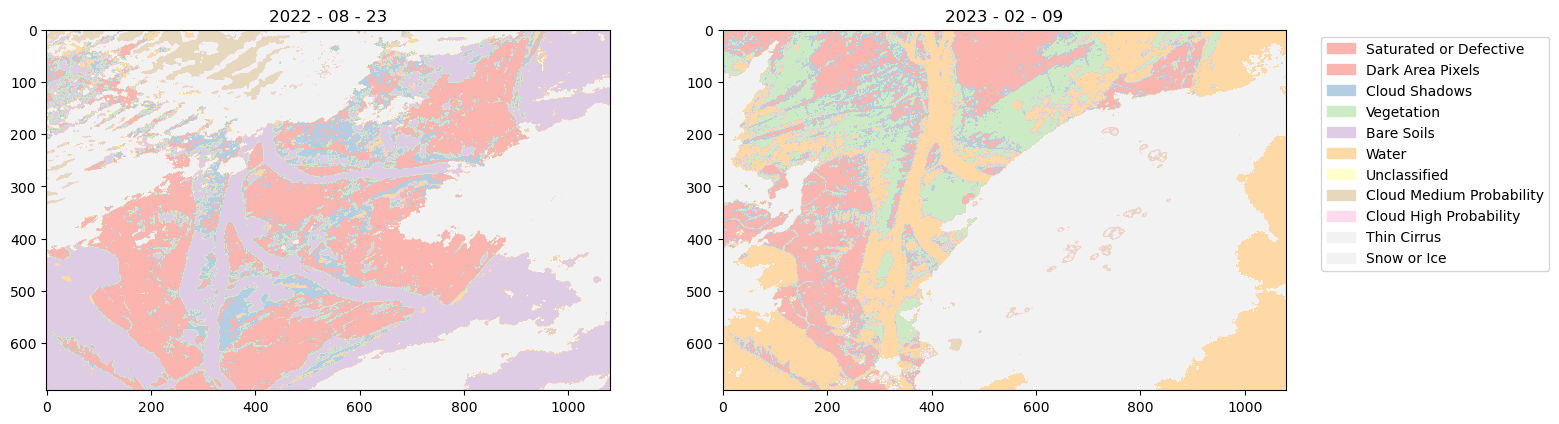

In [8]:

# cmap = plt.get_cmap('tab20', 12)
# plt.figure(figsize = (16, 5))
# plt.subplot(1, 2, 1)
# ds_slice.scl.plot.imshow(cmap=cmap, add_colorbar=False)
# plt.subplot(1, 2, 2)
# ds_slice1.scl.plot.imshow(cmap=cmap, add_colorbar=False)
# rgb(ds, bands=['red', 'green', 'blue'], index=[0, 1]) 


cmap = plt.get_cmap('Pastel1', 12)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
im = axs[0].imshow(ds_slice.scl, cmap=cmap)
axs[0].set_title('2022 - 08 - 23')
im1 = axs[1].imshow(ds_slice1.scl, cmap=cmap)
axs[1].set_title('2023 - 02 - 09')

# Add colorbar
# fig.colorbar(im, ax=axs[0], ticks=np.arange(len(classes))+0.5)
# fig.colorbar(im1, ax=axs[1], ticks=np.arange(len(classes))+0.5)

# # Add legend
# # legend_handles = []
# # for c in classes:
# #     legend_handles.append(plt.Rectangle((0, 0), 1, 1, color=cmap(c['value']-1), label=c['name']))
# # plt.legend(handles=legend_handles, loc='lower right')
classes = [
    {'name': 'Saturated or Defective', 'value': 1},
    {'name': 'Dark Area Pixels', 'value': 2},
    {'name': 'Cloud Shadows', 'value': 3},
    {'name': 'Vegetation', 'value': 4},
    {'name': 'Bare Soils', 'value': 5},
    {'name': 'Water', 'value': 6},
    {'name': 'Unclassified', 'value': 7},
    {'name': 'Cloud Medium Probability', 'value': 8},
    {'name': 'Cloud High Probability', 'value': 9},
    {'name': 'Thin Cirrus', 'value': 10},
    {'name': 'Snow or Ice', 'value': 11},
]
colors = cmap(np.linspace(0, 1, len(classes)))
patches = [plt.Rectangle((0,0),1,1, color=colors[i]) for i in range(len(classes))]
plt.legend(patches, [c['name'] for c in classes], bbox_to_anchor=(1.05, 1), loc='upper left')

# rgb(ds, bands=['red', 'green', 'blue'], index=[0, 1]) 
# Define the classes

# Add a colorbar to the plot
# colors = cmap(np.linspace(0, 1, len(classes)))
# patches = [plt.Rectangle((0,0),1,1, color=colors[i]) for i in range(len(classes))]
# plt.legend(patches, [c['name'] for c in classes], bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


In [ ]:
# rgb(ds, bands=['red', 'green', 'blue'], index=[0, 1]) 